In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.random as npr
import pandas_datareader as pdr
from pandas_datareader import data as pdr
import math
import yfinance as yf


In [78]:
yf.pdr_override()

In [79]:
End = dt.datetime.now()
Start = dt.datetime(2017,1,1)
Apple = pdr.get_data_yahoo('AAPL', Start, End)
Close_price = Apple.Close
Close_price.head()


[*********************100%***********************]  1 of 1 completed


Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
Name: Close, dtype: float64

In [80]:
# Printing Returns

Returns = np.log(Apple.Close/Apple.Close.shift(1)).dropna()
Returns.head()

Date
2017-01-04   -0.001120
2017-01-05    0.005072
2017-01-06    0.011087
2017-01-09    0.009118
2017-01-10    0.001008
Name: Close, dtype: float64

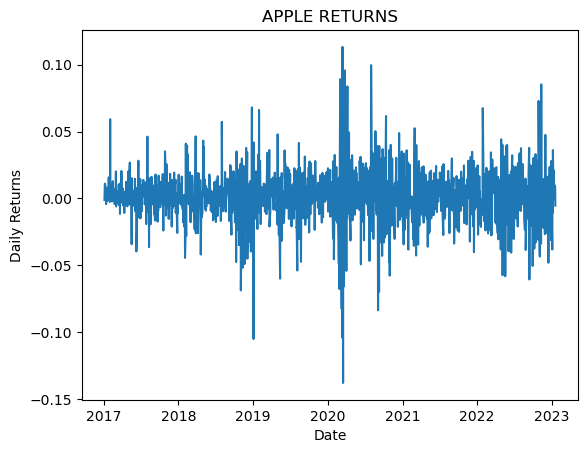

In [81]:
# Ploting the chart

plt.plot(Returns)
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.title('APPLE RETURNS')
plt.show()

<AxesSubplot:xlabel='Date'>

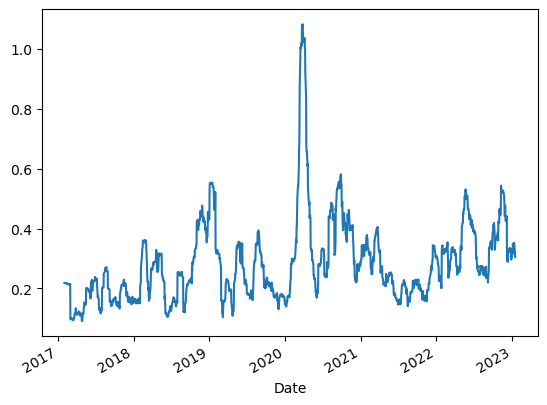

In [82]:
# Calculating the Volatility

TRADING_DAYS = 20
volatility = Returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)
volatility.plot()

In [83]:
#Blackscholes Merton Model

S0 = 43921
R = 0.06
Sm = 0.15 #sigma
T = 1
I = 20000
K = 140


In [84]:
# Defining Goemetric Brownian Motion

def gbm_mcs_stat(K):
    I = 10000
M = 100
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((R - 0.5 * Sm ** 2) * dt + Sm * math.sqrt(dt) * npr.standard_normal(I))
    hT = np.maximum(S[t] - K, 0)
    C0 = math.exp(-R * T) * np.mean(hT)
    print (C0)
    gbm_mcs_stat(K=140)

41258.432929358314
41273.70560346097
41297.57192583904
41324.39454456509
41344.11334265686
41366.642953564464
41395.591687516
41419.49046806497
41440.22580341637
41465.86140403425
41497.79527351306
41518.75904526633
41551.73919100552
41580.84736545813
41612.248956000185
41625.02403259343
41652.8698544918
41679.42838277625
41698.76198622066
41730.89367368188
41765.37186715578
41785.02208592921
41808.044615541396
41836.07136704592
41864.869552470016
41880.87861810948
41903.411425961975
41920.30655840614
41941.52597595432
41960.014328034034
41983.06165820344
42009.75813364834
42034.4427783297
42057.74234452373
42085.44482312938
42109.928061941806
42129.53357529163
42151.58041300749
42168.818296579266
42191.24247656522
42219.3468537964
42241.21716121591
42268.85397560896
42295.14086122414
42317.844436798136
42343.298197289674
42363.317279759474
42389.96991429047
42418.538469246334
42440.33639036061
42461.73375268433
42482.613993787025
42505.68159777868
42532.80494984147
42564.618183152794


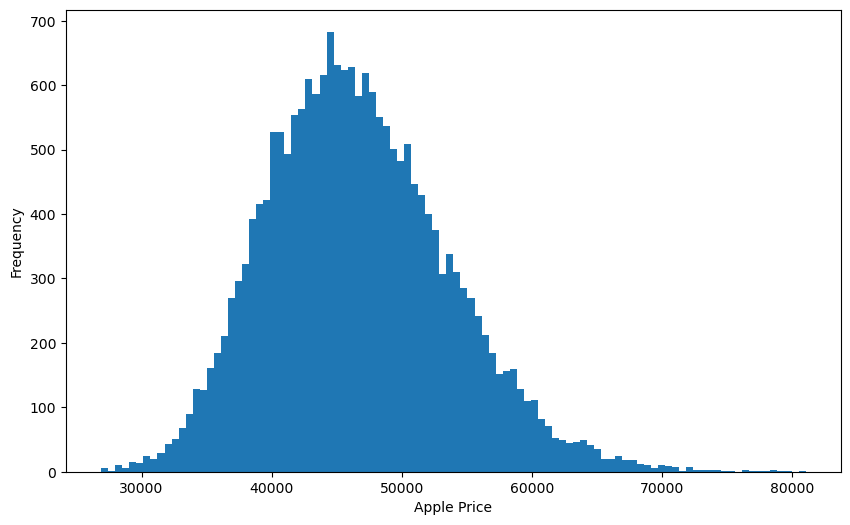

In [85]:
# Plotting the chart

plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=100)
plt.xlabel('Apple Price')
plt.ylabel('Frequency');
